## 1. Load Required Libraries

In [1]:
import os

#input file_location
file_location = 'D:\Project\Course\Pacmann\Tugas\Machine Learning Process\Predictive Maintenance\Coding'

os.chdir(os.path.expanduser(file_location))

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.util as utils
import pandas as pd
import numpy as np
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.ticker as mtick

from scipy.stats import chi2_contingency

from itertools import product
from textwrap import fill

## 2. Load Configuration File

In [3]:
config = utils.load_config()

## 3. Load Train Set

In [4]:
X_train = utils.pickle_load(config['train_test']['directory'] + config['train_test']["X_train"])
y_train = utils.pickle_load(config['train_test']['directory'] + config['train_test']["y_train"])

In [5]:
X_train.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
4058,M,302.0,310.9,1456,47.2,54
1221,M,297.0,308.3,1399,46.4,132
6895,M,301.0,311.6,1357,45.6,137
9863,L,298.9,309.8,1411,56.3,84
8711,L,297.1,308.5,1733,28.7,50


In [6]:
X_train.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
dtype: int64

In [7]:
y_train.head()

4058    0
1221    0
6895    0
9863    0
8711    0
Name: Target, dtype: int64

In [8]:
train_set = pd.concat([X_train, y_train], axis = 1)

In [9]:
train_set.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

In [10]:
X, y = RandomUnderSampler(random_state = 42).fit_resample(X_train, y_train)
train_set_bal = pd.concat([X, y], axis = 1)

In [11]:
train_set_bal.shape

(542, 7)

In [12]:
train_set_bal.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
dtype: int64

## 4. Data Exploration

### 4.1. Quick look dataset

In [13]:
# Quick take a loof to our train data
train_set

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
4058,M,302.0,310.9,1456,47.2,54,0
1221,M,297.0,308.3,1399,46.4,132,0
6895,M,301.0,311.6,1357,45.6,137,0
9863,L,298.9,309.8,1411,56.3,84,0
8711,L,297.1,308.5,1733,28.7,50,0
...,...,...,...,...,...,...,...
980,L,296.1,306.7,1409,42.8,134,0
4266,L,302.7,311.1,1440,39.5,146,0
7772,H,300.3,311.5,1464,41.0,29,0
5780,L,301.7,311.2,1517,42.4,113,0


### 4.2. Label distribution

[Text(0, 0, '7729'), Text(0, 0, '271')]

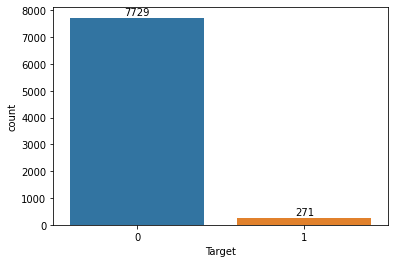

In [14]:
# Check distribution of our label data
ax = sns.countplot(data = train_set, x = "Target", label = train_set["Target"].unique())
ax.bar_label(ax.containers[0])

In [15]:
train_set_bal.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,L,302.5,310.3,1523,36.0,72,0
1,L,295.6,306.3,1636,32.7,56,0
2,L,300.1,309.6,1541,37.0,96,0
3,M,297.7,309.2,1732,28.8,152,0
4,M,304.0,313.1,1450,42.8,101,0


[Text(0, 0, '271'), Text(0, 0, '271')]

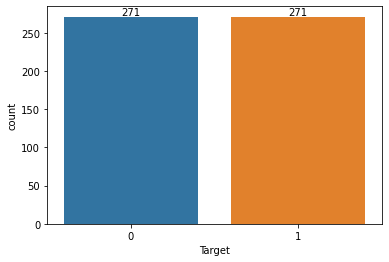

In [16]:
ax = sns.countplot(data = train_set_bal, x = "Target", label = train_set["Target"].unique())
ax.bar_label(ax.containers[0])

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

def plot_histogram_grid(dataframe):
    """
    Plot a grid of histograms for each numerical feature in the DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the numerical features.

    Returns:
        None
    """
    nrows = 3
    ncols = 5

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 7))

    # Flatten the axes array to loop through features
    axes = ax.ravel()

    # Get the list of numerical columns
    numeric_columns = dataframe.columns

    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe, x=column, ax=axes[i], kde=True, color='teal')
        axes[i].set_yticklabels(labels=[])
        axes[i].set_ylabel(ylabel=None)
        axes[i].set_xlabel(xlabel=None)
        axes[i].set_title(label=column, size=9)

    # Remove any empty subplots
    for i in range(len(numeric_columns), nrows * ncols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

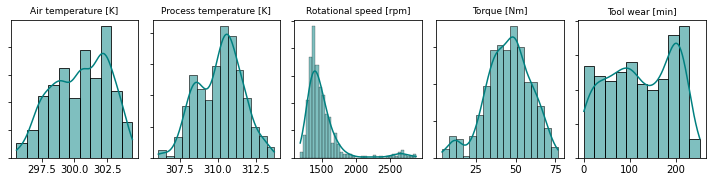

In [18]:
chosen_columns = train_set_bal.drop(columns=['Type', 'Target'])
plot_histogram_grid(chosen_columns)

### 4.3. Air Temperature Distribution

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Density'>

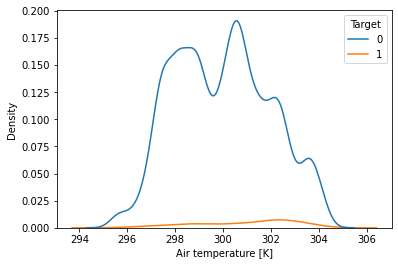

In [19]:
# Check distribution of temperature
sns.kdeplot(data = train_set, x = "Air temperature [K]", hue = "Target")

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Density'>

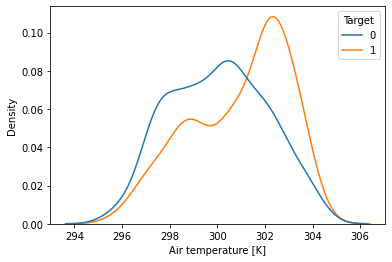

In [20]:
# Dist for balanced data
sns.kdeplot(data = train_set_bal, x = "Air temperature [K]", hue = "Target")

<AxesSubplot:xlabel='Air temperature [K]'>

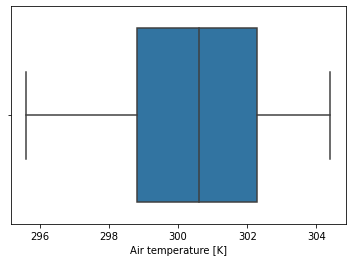

In [21]:
# Check for iqr
sns.boxplot(data = train_set_bal, x = "Air temperature [K]")

In [22]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Air temperature [K]"].quantile(0.25)
q3 = train_set_bal["Air temperature [K]"].quantile(0.75)
iqr = q3 - q1

In [23]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_air = train_set_bal[~((train_set_bal["Air temperature [K]"] < (q1 - 1.5 * iqr)) | (train_set_bal["Air temperature [K]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Density'>

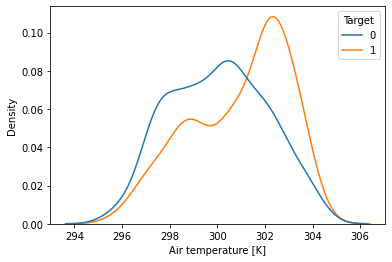

In [24]:
sns.kdeplot(data = train_set_bal_air, x = "Air temperature [K]", hue = "Target")

In [25]:
train_set_bal_air.shape

(542, 7)

### 4.4. Process Temperature

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Density'>

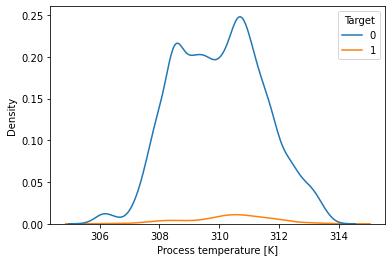

In [26]:
# Check distribution of process temperature
sns.kdeplot(data = train_set, x = "Process temperature [K]", hue = "Target")

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Density'>

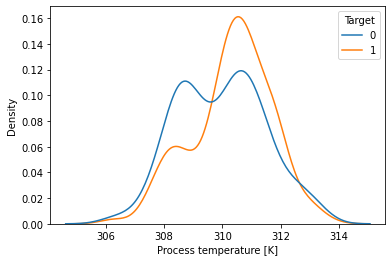

In [27]:
# Dist for balanced data
sns.kdeplot(data = train_set_bal, x = "Process temperature [K]", hue = "Target")

<AxesSubplot:xlabel='Process temperature [K]'>

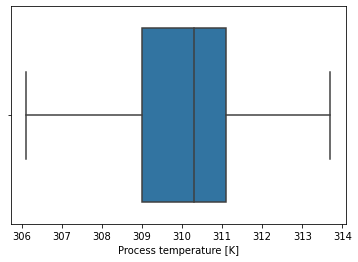

In [28]:
# Check for iqr
sns.boxplot(data = train_set_bal, x = "Process temperature [K]")

In [29]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Process temperature [K]"].quantile(0.25)
q3 = train_set_bal["Process temperature [K]"].quantile(0.75)
iqr = q3 - q1

In [30]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_pro = train_set_bal[~((train_set_bal["Process temperature [K]"] < (q1 - 1.5 * iqr)) | (train_set_bal["Process temperature [K]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Density'>

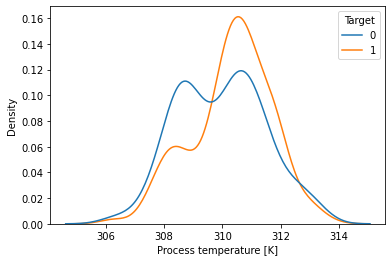

In [31]:
sns.kdeplot(data = train_set_bal_pro, x = "Process temperature [K]", hue = "Target")

In [32]:
train_set_bal_pro.shape

(542, 7)

### 4.5. Torque Distribution

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Density'>

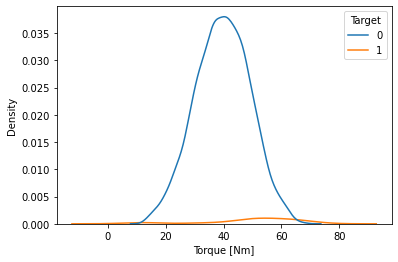

In [33]:
# Check distribution of pressure
sns.kdeplot(data = train_set, x = "Torque [Nm]", hue = "Target")

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Density'>

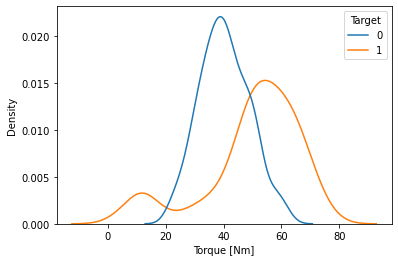

In [34]:
sns.kdeplot(data = train_set_bal, x = "Torque [Nm]", hue = "Target")

<AxesSubplot:xlabel='Torque [Nm]'>

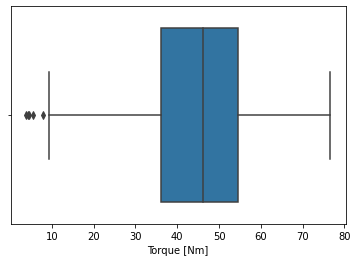

In [35]:
sns.boxplot(data = train_set_bal, x = "Torque [Nm]")

In [36]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Torque [Nm]"].quantile(0.25)
q3 = train_set_bal["Torque [Nm]"].quantile(0.75)
iqr = q3 - q1

In [37]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_torque = train_set_bal[~((train_set_bal["Torque [Nm]"] < (q1 - 1.5 * iqr)) | (train_set_bal["Torque [Nm]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Density'>

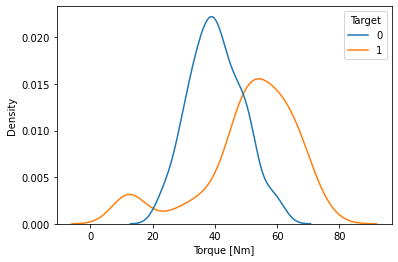

In [38]:
sns.kdeplot(data = train_set_bal_torque, x = "Torque [Nm]", hue = "Target")

<AxesSubplot:xlabel='Torque [Nm]'>

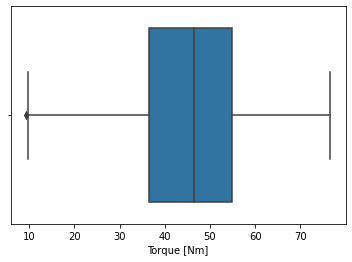

In [39]:
sns.boxplot(data = train_set_bal_torque, x = "Torque [Nm]")

In [40]:
train_set_bal_torque.shape

(537, 7)

### 4.6. Rotational Speed Distribution

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Density'>

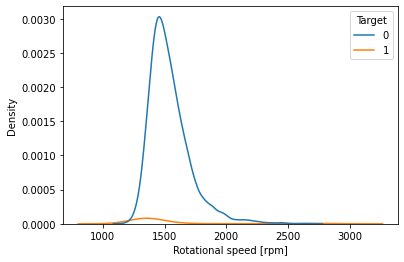

In [41]:
# Check distribution of PM1.0
sns.kdeplot(data = train_set, x = "Rotational speed [rpm]", hue = "Target")

In [42]:
train_set["Rotational speed [rpm]"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .98, .99])

count    8000.000000
mean     1539.356875
std       180.982943
min      1168.000000
25%      1422.000000
50%      1503.000000
75%      1613.000000
80%      1645.000000
85%      1686.000000
90%      1744.000000
95%      1869.000000
98%      2035.120000
99%      2204.020000
max      2886.000000
Name: Rotational speed [rpm], dtype: float64

<AxesSubplot:xlabel='Rotational speed [rpm]'>

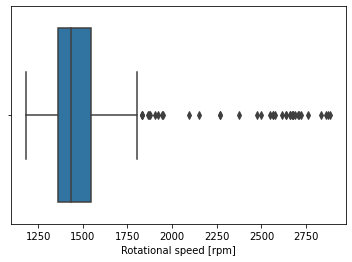

In [43]:
sns.boxplot(data = train_set_bal, x = "Rotational speed [rpm]")

In [44]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Rotational speed [rpm]"].quantile(0.25)
q3 = train_set_bal["Rotational speed [rpm]"].quantile(0.75)
iqr = q3 - q1

In [45]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_speed = train_set_bal[~((train_set_bal["Rotational speed [rpm]"] < (q1 - 1.5 * iqr)) | (train_set_bal["Rotational speed [rpm]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Density'>

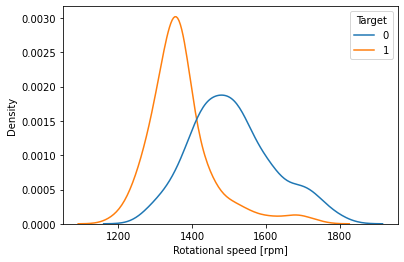

In [46]:
sns.kdeplot(data = train_set_bal_speed, x = "Rotational speed [rpm]", hue = "Target")

<AxesSubplot:xlabel='Rotational speed [rpm]'>

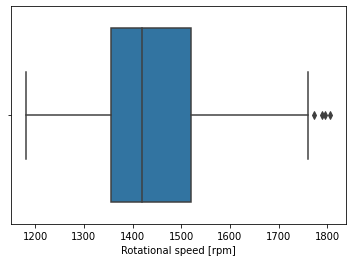

In [47]:
sns.boxplot(data = train_set_bal_speed, x = "Rotational speed [rpm]")

In [48]:
train_set_bal_speed

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,L,302.5,310.3,1523,36.0,72,0
1,L,295.6,306.3,1636,32.7,56,0
2,L,300.1,309.6,1541,37.0,96,0
3,M,297.7,309.2,1732,28.8,152,0
4,M,304.0,313.1,1450,42.8,101,0
...,...,...,...,...,...,...,...
537,L,302.0,310.9,1378,53.1,212,1
538,L,299.1,309.8,1398,55.4,217,1
539,L,303.5,312.4,1284,70.6,94,1
540,L,302.6,310.2,1325,62.4,92,1


### 4.7. Tool Wear Distribution

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Density'>

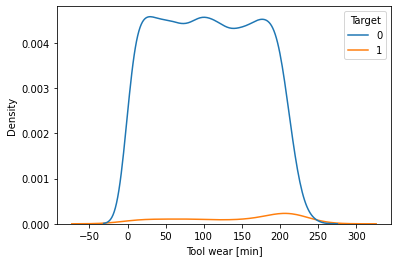

In [49]:
# Check distribution of tool wear
sns.kdeplot(data = train_set, x = "Tool wear [min]", hue = "Target")

In [50]:
train_set["Tool wear [min]"].describe(percentiles = [.25, .50, .75, .80, .85, .90, .95, .98, .99])

count    8000.000000
mean      107.685000
std        63.612002
min         0.000000
25%        53.000000
50%       107.000000
75%       163.000000
80%       174.000000
85%       184.000000
90%       195.000000
95%       206.000000
98%       216.000000
99%       222.000000
max       253.000000
Name: Tool wear [min], dtype: float64

<AxesSubplot:xlabel='Tool wear [min]'>

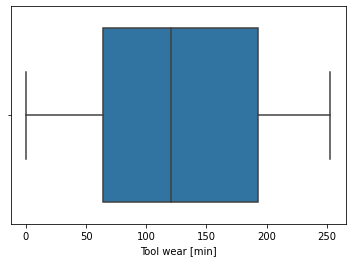

In [51]:
sns.boxplot(data = train_set_bal, x = "Tool wear [min]")

In [52]:
# Find q1 and q3 to create iqr
q1 = train_set_bal["Tool wear [min]"].quantile(0.25)
q3 = train_set_bal["Tool wear [min]"].quantile(0.75)
iqr = q3 - q1

In [53]:
# Filter out rows that outside of range q1 - (1.5 * iqr) and q3 + (1.5 * iqr)
train_set_bal_wear = train_set_bal[~((train_set_bal["Tool wear [min]"] < (q1 - 1.5 * iqr)) | (train_set_bal["Tool wear [min]"] > (q3 + 1.5 * iqr)))].copy()

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Density'>

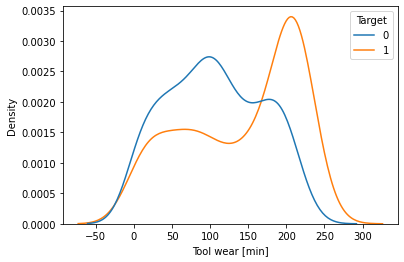

In [54]:
sns.kdeplot(data = train_set_bal_wear, x = "Tool wear [min]", hue = "Target")

In [55]:
train_set_bal_wear.shape

(542, 7)

### 4.15. Cleaned Data

In [56]:
train_set_bal_cleaned = pd.concat(
    [
        train_set_bal_air,
        train_set_bal_pro,
        train_set_bal_torque,
        train_set_bal_speed,
        train_set_bal_wear,
    ]
)

In [57]:
train_set_bal_cleaned.shape

(2667, 7)

In [58]:
count_duplicated_index = train_set_bal_cleaned.index.value_counts()
count_duplicated_index

0      5
256    5
362    5
361    5
360    5
      ..
490    3
487    3
353    3
410    3
415    3
Length: 542, dtype: int64

In [59]:
used_index_data = count_duplicated_index[count_duplicated_index == 5].index
used_index_data

Int64Index([  0, 256, 362, 361, 360, 358, 357, 352, 351, 350,
            ...
            140, 175, 143, 141, 173, 142, 171, 170, 169, 168],
           dtype='int64', length=504)

In [60]:
train_set_bal_cleaned = train_set_bal_cleaned.loc[used_index_data].drop_duplicates()

In [61]:
train_set_bal_cleaned.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,L,302.5,310.3,1523,36.0,72,0
256,H,301.6,310.7,1414,51.7,197,0
362,M,302.0,310.4,1212,55.6,79,1
361,L,301.6,310.7,1380,51.8,216,1
360,M,298.0,308.7,1479,58.5,176,1


In [62]:
train_set_bal_cleaned.shape

(504, 7)

### 4.16. Pairplot

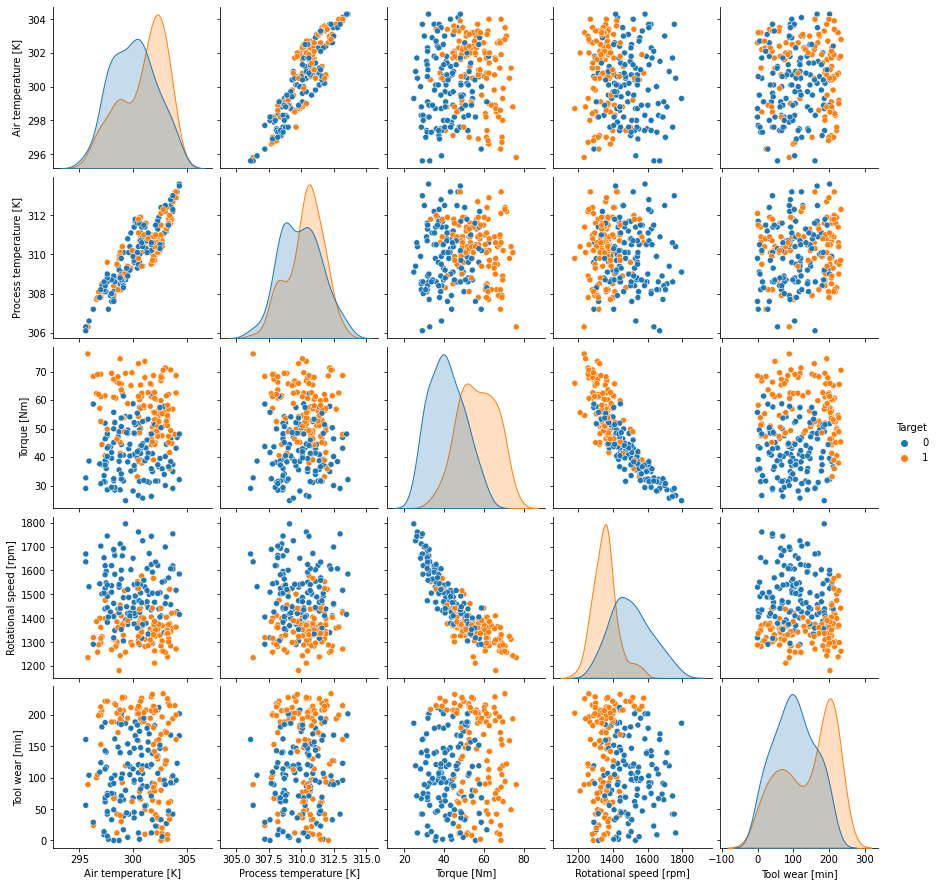

In [63]:
sns.pairplot(
    train_set_bal_cleaned[
        [
            "Air temperature [K]",
            "Process temperature [K]",
            "Torque [Nm]",
            "Rotational speed [rpm]",
            "Tool wear [min]",
            "Target"
        ]
    ].sample(250),
    hue = "Target"
)

<AxesSubplot:>

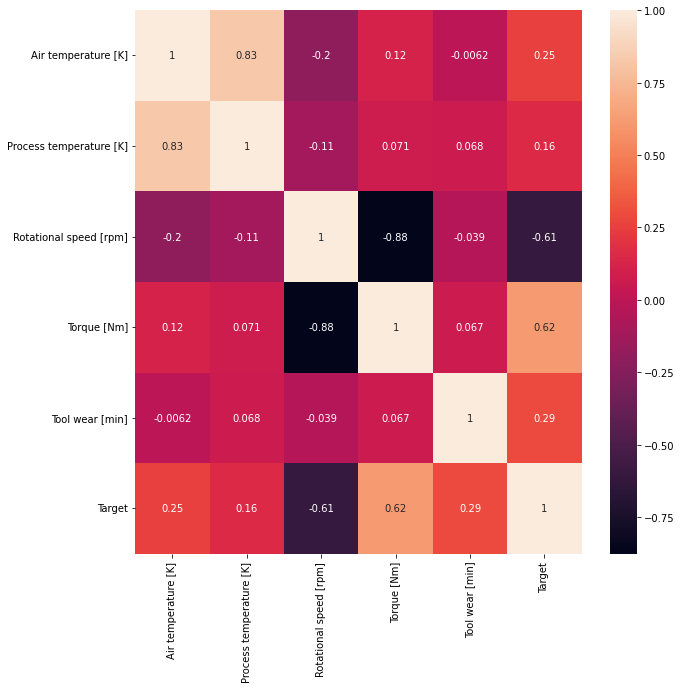

In [64]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set_bal_cleaned.corr(method = "spearman"), annot = True, ax = ax)

In [65]:
X = train_set_bal_cleaned[config['dataset']["predictors"]].copy()
y = train_set_bal_cleaned[config['dataset']["label"]].copy()

In [66]:
X.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,L,302.5,310.3,1523,36.0,72
256,H,301.6,310.7,1414,51.7,197
362,M,302.0,310.4,1212,55.6,79
361,L,301.6,310.7,1380,51.8,216
360,M,298.0,308.7,1479,58.5,176


In [67]:
X.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
dtype: int64

In [74]:
def encoding_category(data):
    # Make a copy of the DataFrame to avoid inplace modification
    encoded_data = data.copy()

    # Replace values in the specified 'category_columns'
    category_columns = config['dataset']['category_columns']
    encoded_data[category_columns] = encoded_data[category_columns].replace({'L': 1, 'M': 2, 'H': 3})

    return encoded_data

In [78]:
train_set_bal_cat_encoder = encoding_category(X)

In [80]:
train_set_bal_cat_encoder.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,302.5,310.3,1523,36.0,72
256,3,301.6,310.7,1414,51.7,197
362,2,302.0,310.4,1212,55.6,79
361,1,301.6,310.7,1380,51.8,216
360,2,298.0,308.7,1479,58.5,176


In [81]:
train_set_bal_cat_encoder.isna().sum()

Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
dtype: int64

In [82]:
train_set_bal_cat_encoder.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,302.5,310.3,1523,36.0,72
256,3,301.6,310.7,1414,51.7,197
362,2,302.0,310.4,1212,55.6,79
361,1,301.6,310.7,1380,51.8,216
360,2,298.0,308.7,1479,58.5,176


In [83]:
train_set_bal_cat_encoder['Type'].unique()

array([1, 3, 2], dtype=int64)

In [87]:
# Convert the list of categorical columns to a boolean mask
categorical_column = X.columns.isin(config['dataset']['category_columns'])
numeric_columns = X.loc[:, ~categorical_column]
# Set the float_format and display descriptive statistics for numerical columns
pd.set_option('float_format', '{:,.2f}'.format)
numeric_columns.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,504.00,504.00,504.00,504.00,504.00
mean,300.49,310.14,"1,442.54",47.59,125.39
std,2.07,1.43,122.91,11.53,71.11
min,295.60,306.10,"1,181.00",24.40,0.00
25%,298.90,308.98,"1,354.75",38.50,65.00
50%,300.60,310.30,"1,420.00",47.50,125.50
75%,302.30,311.10,"1,520.25",55.70,194.25
max,304.40,313.70,"1,806.00",76.60,253.00


In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import product

def plot_histogram_grid(dataframe):
    """
    Plot a grid of histograms for each numerical feature in the DataFrame.

    Parameters:
        dataframe (pd.DataFrame): The DataFrame containing the numerical features.

    Returns:
        None
    """
    nrows = 3
    ncols = 5

    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 7))

    # Flatten the axes array to loop through features
    axes = ax.ravel()

    # Get the list of numerical columns
    numeric_columns = dataframe.columns

    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe, x=column, ax=axes[i], kde=True, color='teal')
        axes[i].set_yticklabels(labels=[])
        axes[i].set_ylabel(ylabel=None)
        axes[i].set_xlabel(xlabel=None)
        axes[i].set_title(label=column, size=9)

    # Remove any empty subplots
    for i in range(len(numeric_columns), nrows * ncols):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

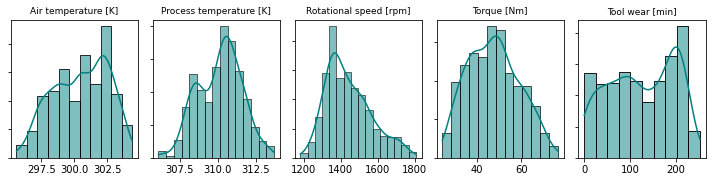

In [89]:
plot_histogram_grid(numeric_columns)